[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'^GSPC'}, xlabel='Date'>

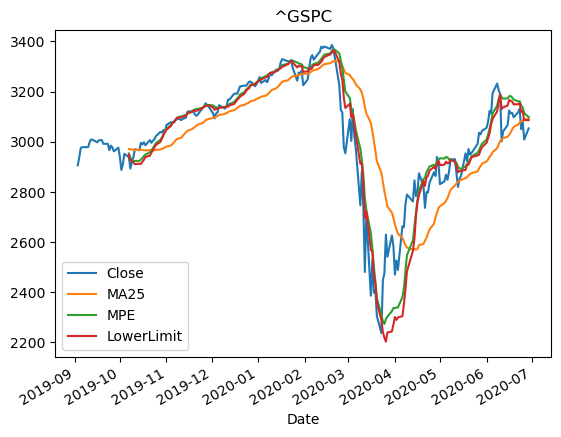

In [107]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyfinance.ols import RollingOLS, PandasRollingOLS
from scipy.stats import norm
import pandas_ta as ta

window=25
ticker='^GSPC'
df=yf.download(tickers= ticker,start= '2019-9-01', end='2020-6-30',interval = "1d",
                     group_by = 'column',auto_adjust = True, prepost = True, 
                     proxy = None)
#df=pd.read_csv("ols.csv")
df['X'] = np.arange(len(df))+1
r=PandasRollingOLS(df['Close'], df['X'], window)
df['MPE']=r.alpha+r.beta['feature1']*df['X']
df['SEE']=np.sqrt(((df['Close']-df['MPE'])).fillna(0)**2/(window-2))
df['LowerLimit']=df['MPE']-1.28*df['SEE']
df['MA25']=df['Close'].rolling(window).mean()
df[['Close','MA25','MPE','LowerLimit']].plot(title=ticker)

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'^GSPC'}, xlabel='Date'>

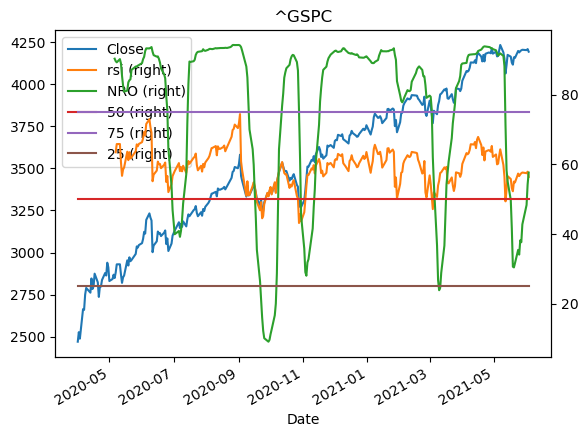

In [119]:

def get_indicator(q, ind_name, params):
    ts = None
    if ind_name == "rsi":
        ts = q.ta.rsi(params['length'])
        
    return ts

window=25
ticker='^GSPC'
df=yf.download(tickers= ticker,start= '2020-4-01', end='2021-6-4',interval = "1d",
                     group_by = 'column',auto_adjust = True, prepost = True, 
                     proxy = None)
#df=pd.read_csv("ols.csv")
df['X'] = np.arange(len(df))+1
r=PandasRollingOLS(df['Close'], df['X'], window)
df['MPE']=r.alpha+r.beta['feature1']*df['X']
df['std_MPE']=(df['MPE']-df['Close'].rolling(window).mean())/df['Close'].rolling(window).std()
df['NRO'] = df['std_MPE'].apply(norm.cdf)*100
df['rsi']=get_indicator(df, 'rsi', {'length': window})
df['50']=50
df['25']=25
df['75']=75
df[['Close','rsi','NRO','50','75','25']].plot(secondary_y=['NRO','rsi','50','25','75'],title=ticker)